In [7]:
import vist
import numpy as np
import json
import matplotlib.pyplot as plt
from datetime import datetime
from os.path import join
from pprint import pprint
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)

### Load Story-in-Sequence Instance

In [5]:
vist_images_dir = '../../../data/vist/images'
vist_annotations_dir = '../../../data/vist/data/visualstorytelling'
sis = vist.Story_in_Sequence(vist_images_dir, vist_annotations_dir)

sis's [train] loaded. It took 1.91 seconds.
sis's [val] loaded. It took 0.19 seconds.
sis's [test] loaded. It took 0.36 seconds.
Make mapping ...
Mapping for [Albums][Images][Stories][Sents] done.


### Let's check one album.

In [14]:
album_id = list(sis.Albums.keys())[10]
album_id = "72157602780268689"
# sis.show_album("72157602780268689")
album = sis.Albums[album_id]
pprint(album)

{'date_create': '1193636245',
 'date_update': '1326579305',
 'description': '',
 'farm': '3',
 'id': '72157602780268689',
 'img_ids': ['1796791735',
             '1796792721',
             '1796793565',
             '1796794277',
             '1796795269',
             '1797636614',
             '1796797347',
             '1797638724',
             '1797639804',
             '1797640980',
             '1796801903',
             '1796802911',
             '1796803887',
             '1796804997',
             '1796806125',
             '1797647532',
             '1796808541',
             '1797650088',
             '1797651016',
             '1796812039',
             '1796813107',
             '1797654248',
             '1796815349',
             '1797656648',
             '1796817637',
             '1796818703'],
 'owner': '85621736@N00',
 'photos': '26',
 'primary': '1796818703',
 'secret': '4c6ae1e8e7',
 'server': '2399',
 'split': 'test',
 'story_ids': ['46900', '46901', '46902', '4

### Check its story

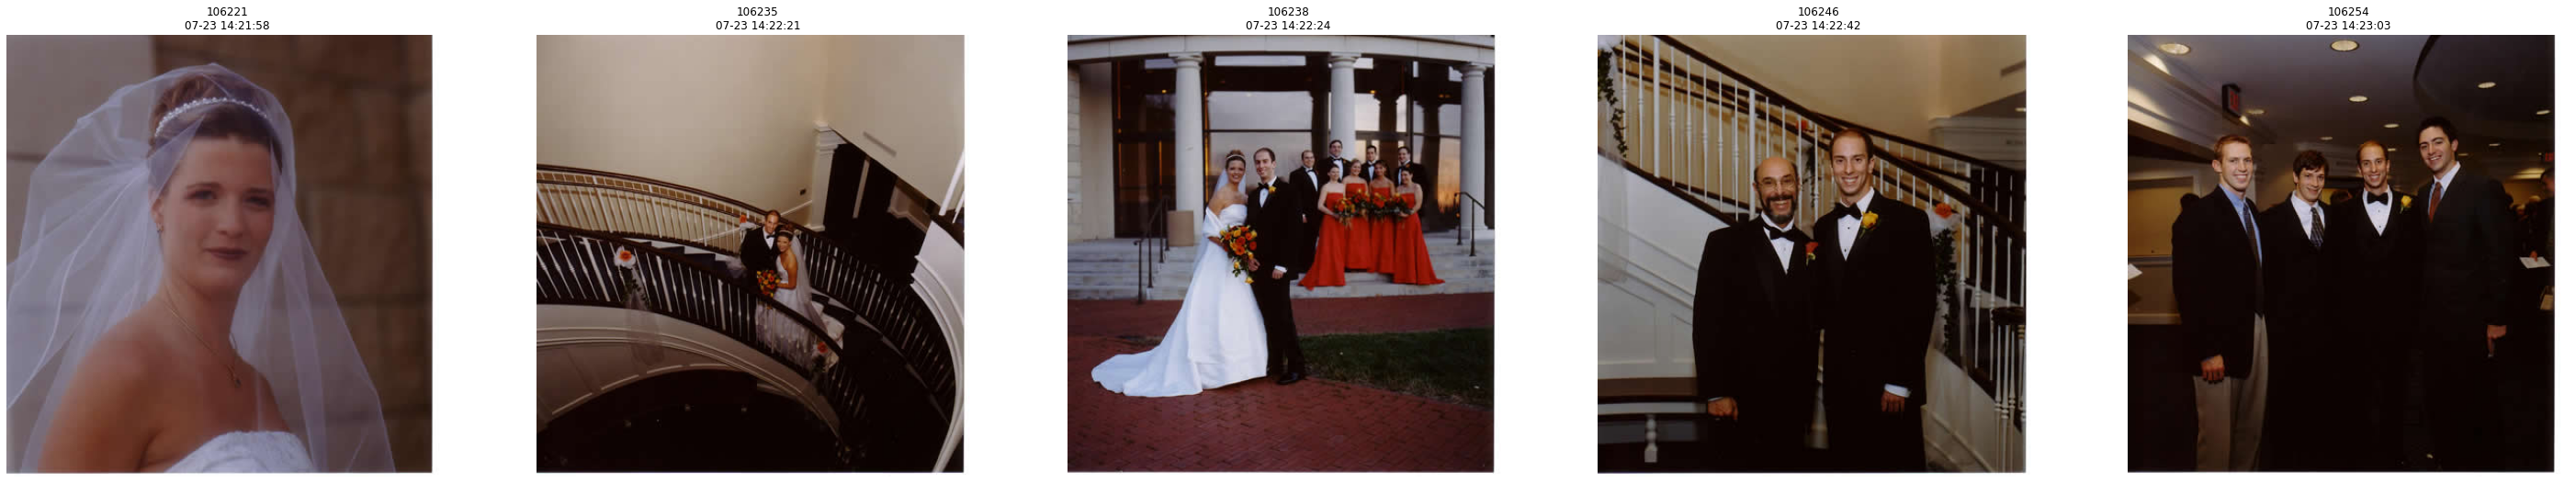

Original Sentences:
0: the bride was so happy she got married .
1: the bride and groom both took pictures at the church .
2: the friends of the married couple were glad to be there .
3: the best man was excited to give his speech after .
4: over all the wedding was perfect .


CNN + BART Predicted Sentences:
0: i saw a lot of interesting people at the wedding
1: there were many types of people there
2: the bride and groom looked great together
3: they were happy to be together again
4: the dinner was lovely


CNN + Concept + BART Predicted Sentences:
0: [female] was wearing her best veil at her wedding
1: at the first moment of the ceremony , she took one last picture before leaving
2: the bride was very happy and the bridesmaids were as well
3: [male] was very stunning in his bridesmaids outfit
4: they took the back of the dress and the groom was very tall
5: [male] had no problem with his tie but the bridesmaids got it


In [4]:
sis.show_story(album_id='214418', story_id='50340')
# sis.show_album("214418")

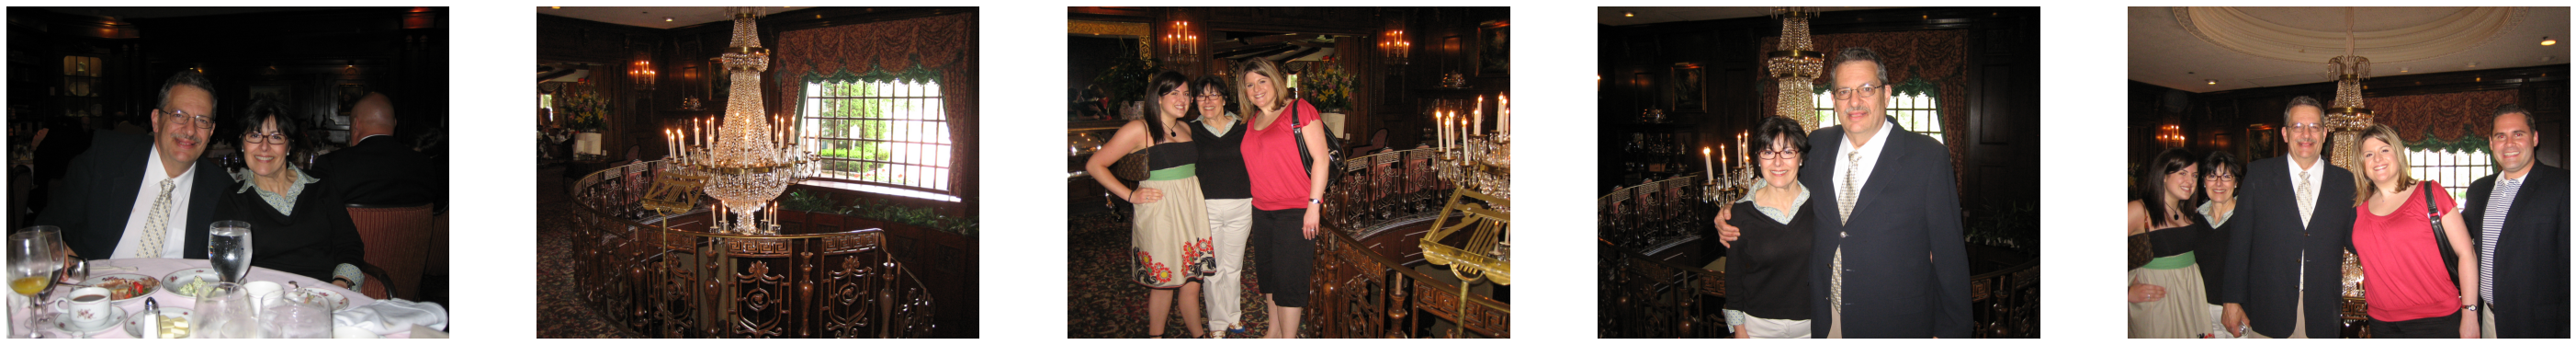

Original Sentences:
0: we came out to celebrate our uncle 's 1 year sobriety this afternoon .
1: the restaurant had some gorgeous decorations .
2: many of us had not seen each other since the intervention and caught up that day .
3: his wife was so proud of him for reaching the achievement .
4: then we huddled together to capture this moment that changed his life .


CNN + BART Predicted Sentences:
0: [male] was ready for his big day
1: his family and friends were there to celebrate
2: he was happy to see his family
3: they were proud of him
4: the cake was served to everyone


CNN + Concept + BART Predicted Sentences:
0: the wedding was held at a different place this eve
1: inside was decorated with a lot of decorations that looked like christmas trees
2: my friends and i brought their food to the party , and everyone enjoyed every chance to get some good seats
3: and in the end , it was time to take some pictures
4: we all gathered and took a final look at a grandpron before we left


In [4]:
sis.show_story('72157605678623604', '45670')

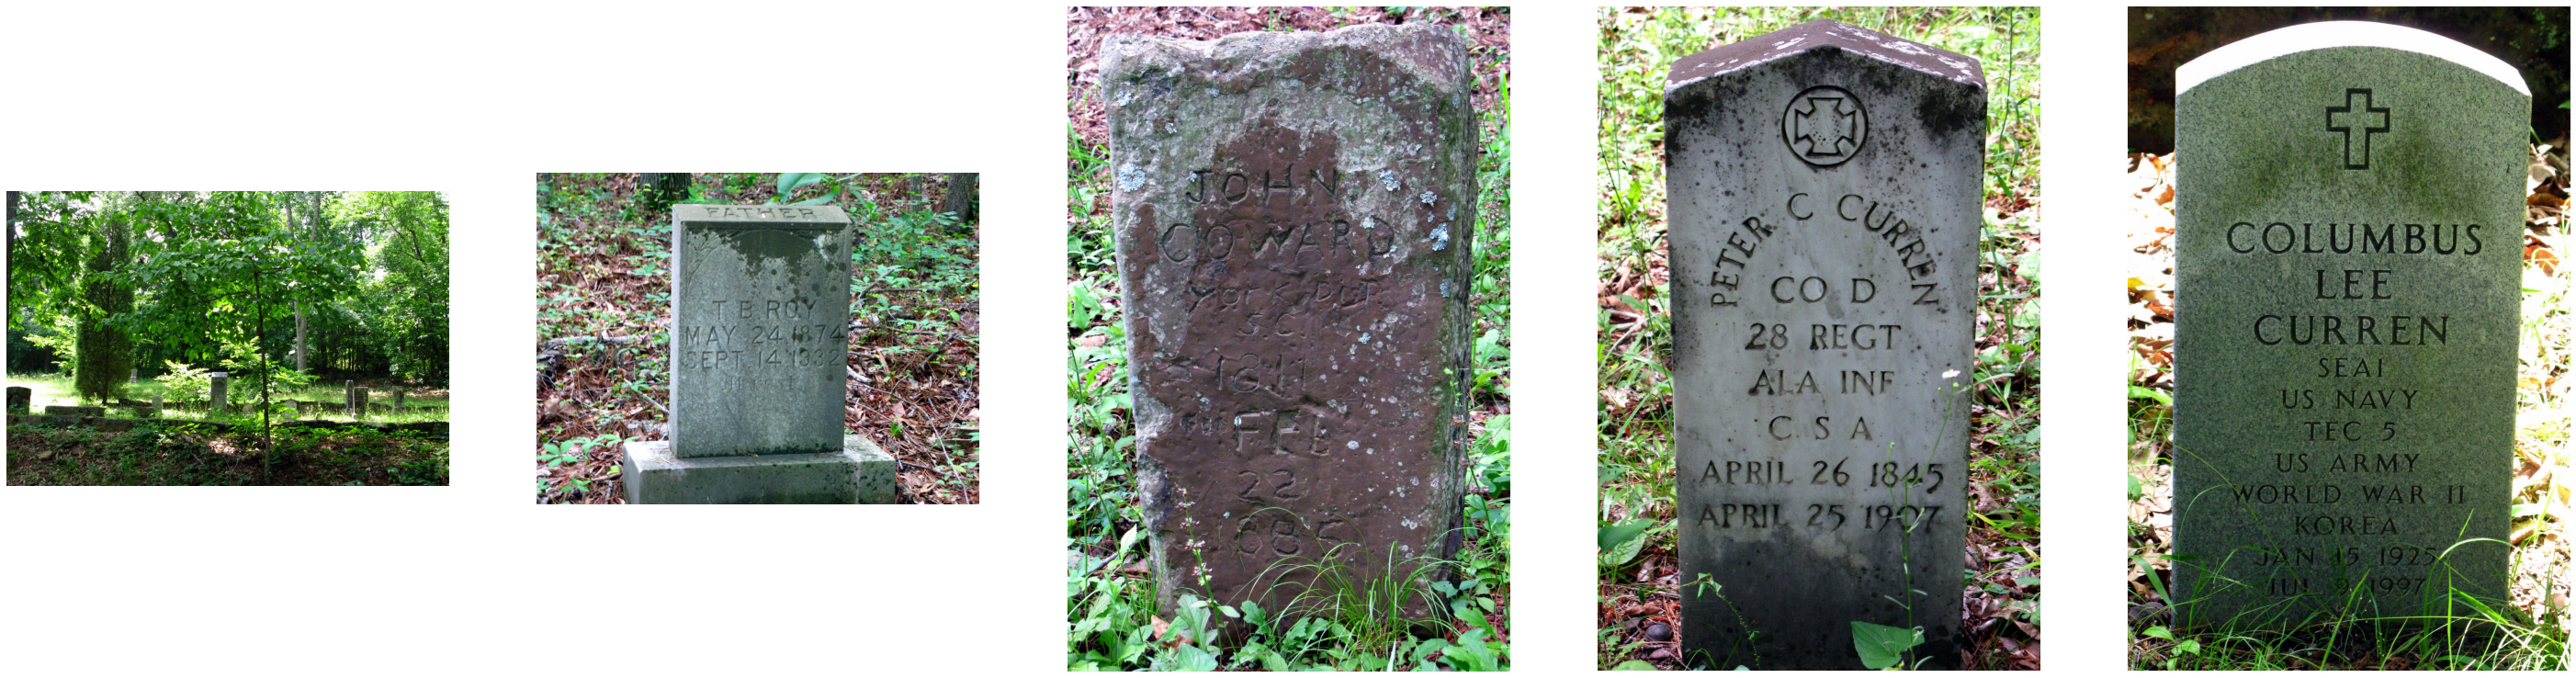

Original Sentences:
0: this is an old cemetery in location .
1: a lot of war veterans are buried here .
2: some headstones are no longer readable .
3: [male] was the last of his family to pass away that was born in the 1800 's .
4: this was his army buddy location .


CNN + BART Predicted Sentences:
0: the barn was a historical monument
1: it had several generations of man and women buried there
2: the name of the house was unknown to the people
3: many years later , the ground was covered with thick leaves
4: in some of the walls , there was a tombstone on the ground


CNN + Concept + BART Predicted Sentences:
0: i visited the location cemeteries
1: the war memorial was very interesting
2: some were destroyed by flood
3: the gravestones were massive
4: the grave stones were very long
5: i had to read through many of them for hours


In [5]:
sis.show_story('72157624096000559', '45773')

In [25]:
gold_sent_length = [i["length"] for i in sis.sents]
print(min(gold_sent_length))
print(max(gold_sent_length))
print(np.mean(gold_sent_length))
print(np.median(gold_sent_length))

1
92
11.350059760956174
10.0


In [6]:
def print_scores(arr):
    print("min: ", min(arr))
    print("max: ", max(arr))
    print("mean: ", np.mean(arr))
    print("median: ", np.median(arr))


gold_story_length = []
for story in sis.stories:
    sents_length = sum([sis.Sents[ids]["length"] for ids in story["sent_ids"]])
    gold_story_length.append(sents_length)
print_scores(gold_story_length)

min:  17
max:  282
mean:  56.750298804780876
median:  54.0


In [13]:
def get_prediction_length(path):
    prediction = json.load(open(path))
    
    pred_story_length = []
    for story in prediction.values():
        if len(story) > 1:
            sents = story[1].strip().split(" ")
        else:
            sents = story[0].strip().split(" ")
        sents = [i for i in sents if i != "."]
        pred_story_length.append(len(sents))
    print("Story Length")
    print_scores(pred_story_length)

    pred_sent_length = []
    for story in prediction.values():
        print(story)
        break
        if len(story) > 1:
            sents = story[1].strip().split(" ")
        else:
            sents = story[0].strip().split(" ")
        for sent in sents:
            sent = sent.strip().split(" ")
            if len(sent) > 0:
                pred_sent_length.append(len(sent))
    print("Sentence Length")
    print_scores(pred_sent_length)
    
# path1 = "../res/baseline_result_epoch10_nocat.txt"
# get_prediction_length(path1)

# path2 = "../res/baseline_result_concept.txt"
# get_prediction_length(path2)

path = "../res"
all_models_scripts = [
        "baseline/baseline_result_epoch10_nocat.txt", #CNN + BART   0
        "baseline/baseline_result_concept.txt", # CNN + Concept + BART   1
        "emotion_experiments/4_single_emotion_noconcept.txt", # CNN + BART + SingleE   2
        "emotion_experiments/4_single_emotion_concept.txt", # CNN + Concept + Bart + SingleE   3
        "emotion_experiments/4_multi_emotion_noconcept.txt", # CNN  + Bart + MultiE   4
        "emotion_experiments/4_multi_emotion_concept.txt", #CNN + Concept + Bart + MultiE   5

    ]

for i, script in enumerate(all_models_scripts):
    print(f"Model {i}:")
    get_prediction_length(join(path, script))
    print("\n")

Model 0:
Story Length
min:  13
max:  100
mean:  40.25148514851485
median:  38.0
['  i saw a lot of interesting people at the wedding . there were many types of people there . the bride and groom looked great together . they were happy to be together again . the dinner was lovely .']
Sentence Length


ValueError: min() arg is an empty sequence

In [11]:
sis.Stories['47064']

{'id': '47064',
 'sent_ids': ['235320', '235321', '235322', '235323', '235324'],
 'img_ids': ['6270279393',
  '6270811678',
  '6270282667',
  '6270283215',
  '6270288311'],
 'album_id': '72157627829815505'}

In [10]:
story_ids = sis.Albums[album_id]['story_ids']
story_id = story_ids[0]
sis.show_story('214418')
print(sis.Stories[story_id]['img_ids'])

KeyError: '214418'

## Here are some stats about SIS dataset.

In [5]:
# albums stats
split_to_album_ids = {'train': [], 'val': [], 'test': []}
total_albums = 0
for split in ['train', 'val', 'test']:
    split_to_album_ids[split] = [album_id for album_id, album in sis.Albums.items() if album['split'] == split]
    print 'There are [%s] albums in [%s] split.' % (len(split_to_album_ids[split]), split)
    total_albums += len(split_to_album_ids[split])
print 'In total, there are [%s] albums.' % total_albums

There are [8031] albums in [train] split.
There are [998] albums in [val] split.
There are [1011] albums in [test] split.
In total, there are [10040] albums.


In [6]:
# stories stats
split_to_story_ids = {'train': [], 'val': [], 'test': []}
for story in sis.stories:
    album_id = story['album_id']
    split = sis.Albums[album_id]['split']
    split_to_story_ids[split] += [story['id']]
total_stories = 0
for split in ['train', 'val', 'test']:
    print 'There are [%s] stories in [%s] split.' % (len(split_to_story_ids[split]), split)
    total_stories += len(split_to_story_ids[split])
print 'In total, there are [%s] stories.' % (total_stories)

There are [40155] stories in [train] split.
There are [4990] stories in [val] split.
There are [5055] stories in [test] split.
In total, there are [50200] stories.


In [7]:
# sents stats
print 'SIS:'
split_to_sent_ids = {'train': [], 'val': [], 'test': []}
for sent in sis.sents:
    album_id = sent['album_id']
    split = sis.Albums[album_id]['split']
    split_to_sent_ids[split] += [sent['id']]
total_sents = 0
for split in ['train', 'val', 'test']:
    print 'There are [%s] sents in [%s] split.' % (len(split_to_sent_ids[split]), split)
    total_sents += len(split_to_sent_ids[split])
print 'In total, there are [%s] sents.' % (total_sents)

SIS:
There are [200775] sents in [train] split.
There are [24950] sents in [val] split.
There are [25275] sents in [test] split.
In total, there are [251000] sents.


In [8]:
# check story order
def check_dts_order(dts):
    flag = True
    for i in range(1, len(dts)):
        if dts[i] <= dts[i-1]:
            flag = False
    return flag

inorder = 0
for story in sis.stories:
    dts = []
    for i, sent_id in enumerate(story['sent_ids']):
        sent = sis.Sents[sent_id]
        assert sent['order'] == i
        img = sis.Images[sent['img_id']]
        dt = datetime.strptime(img['datetaken'], '%Y-%m-%d %H:%M:%S')
        dts += [dt]
    if check_dts_order(dts):
        inorder += 1
print 'Among %s stories, %s [%.2f%%] are in order' % (len(sis.stories), inorder, inorder*100.0/len(sis.stories))

Among 50200 stories, 31481 [62.71%] are in order


In [9]:
# img_ids = sis.Stories[story_id]['img_ids']
# dii.show_imgs_with_sents(img_ids, False)

In [12]:
# Load DII instance
dii = vist.Description_in_Isolation(vist_images_dir, vist_annotations_dir)

# DII's sents stats
print 'DII:'
dii_split_to_sent_ids = {'train': [], 'val': [], 'test': []}
for sent in dii.sents:
    album_id = sent['album_id']
    split = dii.Albums[album_id]['split']
    dii_split_to_sent_ids[split] += [sent['id']]
total_sents = 0
for split in ['train', 'val', 'test']:
    print 'There are [%s] sents in [%s] split.' % (len(dii_split_to_sent_ids[split]), split)
    total_sents += len(dii_split_to_sent_ids[split])
print 'In total, there are [%s] sents.' % (total_sents)

dii's [train] loaded. It took 6.67 seconds.
dii's [val] loaded. It took 0.47 seconds.
dii's [test] loaded. It took 0.54 seconds.
Make mapping ...
Mapping for [Albums][Images][Sents] done.
DII:
There are [120465] sents in [train] split.
There are [14970] sents in [val] split.
There are [15165] sents in [test] split.
In total, there are [150600] sents.
